In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
path = "file:///opt/home/Downloads/body_image.xls"
data = pd.read_excel(path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  236 non-null    object 
 1   Height  236 non-null    float64
 2   GPA     236 non-null    object 
 3   HS GPA  236 non-null    object 
 4   Seat    236 non-null    object 
 5   WtFeel  229 non-null    object 
 6   Cheat   236 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.0+ KB


In [4]:
# clean up the "*"
data = data.replace("*", np.NaN)

Out of the first ten students in the datafile, how many typically sit in the back of the classroom?

In [5]:
ten = data.head(10)
len(ten[ten["Seat"] == "B"])

2

Out of the first ten students in the datafile, how many students have a college GPA which is higher than their high school GPA?

In [6]:
len(ten[ten["GPA"] > ten["HS GPA"]])

3

What is the typical seat of the student with the highest GPA among the first ten students in the datafile? (use the code as your answer)

In [7]:
ten.nlargest(1, "GPA")["Seat"]

8    M
Name: Seat, dtype: object

**Q1**. Is there a relationship between students' college GPAs and their high school GPAs?

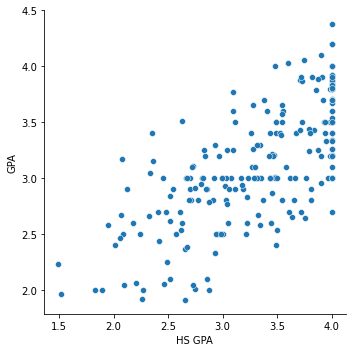

In [8]:
sns.relplot(x=data["HS GPA"], y=data["GPA"])

In [9]:
data.corr()

,Height,GPA,HS GPA
Height,1.000000,-0.098960,-0.121935
GPA,-0.098960,1.000000,0.715547
HS GPA,-0.121935,0.715547,1.000000


In [10]:
data["HS GPA"].corr(data["GPA"])

0.7155473634222818

<AxesSubplot:xlabel='HS GPA', ylabel='GPA'>

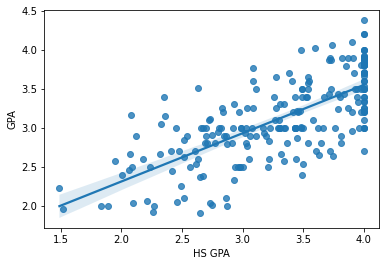

In [11]:
sns.regplot(x="HS GPA", y="GPA", data=data)

linear regression (https://www.statology.org/simple-linear-regression-in-python/)

In [12]:
import statsmodels.api as sm

In [13]:
gpa = data[["GPA", "HS GPA"]].dropna()
x = gpa["HS GPA"]
y = gpa["GPA"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

In [14]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     237.1
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           4.56e-37
Time:                        15:54:04   Log-Likelihood:                -98.512
No. Observations:                 228   AIC:                             201.0
Df Residuals:                     226   BIC:                             207.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0727      0.135      7.935      0.0

**Q2**. Are there differences between males and females with respect to body image?

In [15]:
data.head()

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
0,Female,64.0,2.60,2.63,M,AboutRt,No
1,Male,69.0,2.70,3.72,M,AboutRt,No
2,Female,66.0,3.00,3.44,F,AboutRt,No
3,Female,63.0,3.11,2.73,F,AboutRt,No
4,Male,72.0,3.40,2.35,B,OverWt,No


In [16]:
pd.crosstab(data["Gender"], data["WtFeel"])

WtFeel,AboutRt,OverWt,UnderWt
Gender,,,
Female,107,32,6
Male,56,15,13


In [17]:
pd.crosstab(data["Gender"], data["WtFeel"],normalize="index",margins=True)

WtFeel,AboutRt,OverWt,UnderWt
Gender,,,
Female,0.737931,0.220690,0.041379
Male,0.666667,0.178571,0.154762
All,0.711790,0.205240,0.082969


**Q3**. Is students' academic performance in college related to their typical seating location in class?

In [18]:
data["Seat"].unique()

array(['M', 'F', 'B'], dtype=object)

<AxesSubplot:xlabel='Seat', ylabel='GPA'>

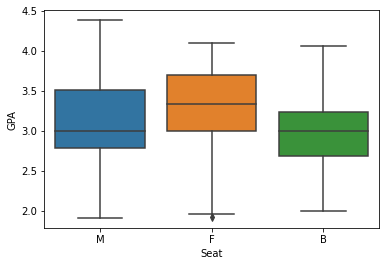

In [19]:
sns.boxplot(data=data,x="Seat",y="GPA")

In [20]:
data.groupby("Seat")["GPA"].describe()

,count,mean,std,min,25%,50%,75%,max
Seat,,,,,,,,
B,46.0,2.974348,0.493296,2.00,2.6775,3.00,3.2375,4.06
F,51.0,3.251098,0.567237,1.92,3.0000,3.33,3.7000,4.10
M,131.0,3.118931,0.526408,1.91,2.7800,3.00,3.5050,4.38


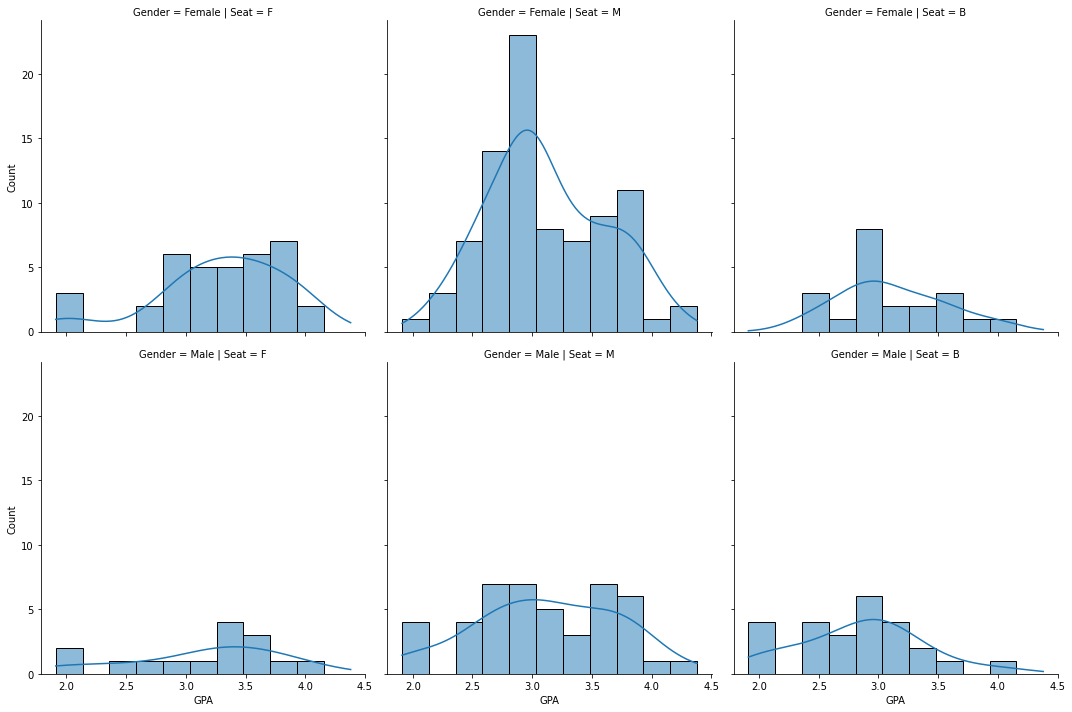

In [30]:
sns.displot(data=data,x="GPA",col="Seat",col_order=["F","M","B"],kde=True, row="Gender")

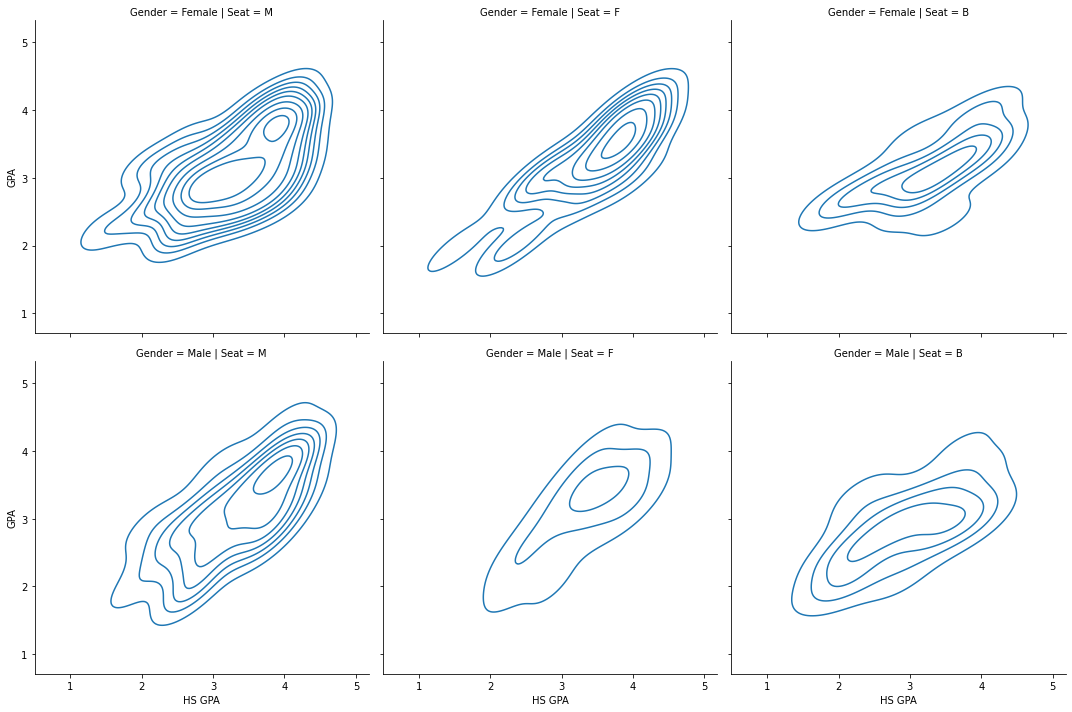

In [29]:
sns.displot(x="HS GPA", y="GPA", data=data, kind="kde", col="Seat", row="Gender")